### Muestreo Sub Nyquist
Tenemos una señal modulada de AM, particularmente se busca muestrearla con una frecuencia inferior a la de Nyquist, por ende, es necesario determinar cuántos espectro de banda base se desean repetir dentro del intervalo permitido. Para eso,
se establecen los rangos superior e inferior para cada escenario.

In [2]:
def fs_max_norm(R: float, m: int) -> float:
    """
    Para cada valor m y R, se calcula el valor máximo
    que puede tomar la frecuencia de muestreo respecto
    del ancho de banda base.
    """
    if m != 0:
        return (2 / m) * (R - 1)
    else:
        return 0

def fs_min_norm(R: float, m: int) -> float:
    """
    Para cada valor de m y R, se calcula el valor mínimo
    que puede tomar la frecuencia de muestreo respecto
    del ancho de banda base.
    """
    return (2 * R) / (m + 1)

def R(fc: float, B: float) -> float:
    """
    Se calcula el factor de espacio. La máxima cantidad
    m+1 de espectros de banda base que entran en el espectro
    libre de la señal pasabanda.
    """
    return (fc + B / 2) / B

def limit_nyquist(rs: list, fn: list):
    """
    Elimino los valores que no cumplen Nyquist.
    """
    result_r = []
    result_f = []
    for r, f in zip(rs, fn):
        if f >= 2:
            result_r.append(r)
            result_f.append(f)
    return result_r, result_f

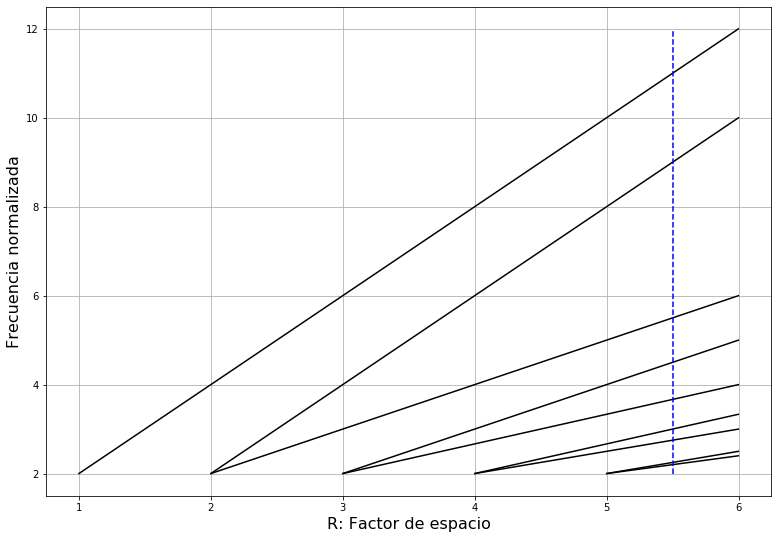

In [7]:
import numpy as np

from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (13, 9)

# Parámetros en cuestión
fp = 3500
fi = 0.8 * fp
f1 = 1.8 * fi
f2 = 2 * fi
f3 = 2.2 * fi
fc = f2
B = f3 - f1

# Graficando los limites
rs = np.arange(1,  6, 0.001)
for m in range(0, 5):
    
    def plot_case(function):
        r_values, f_values = limit_nyquist(rs, [function(R, m) for R in rs])
        pyplot.plot(r_values, f_values, color='black')  
    
    plot_case(fs_min_norm)
    plot_case(fs_max_norm)

pyplot.plot([R(fc, B), R(fc, B)], [2, 12], linestyle='dashed', color='b')
pyplot.xlabel("R: Factor de espacio", fontsize=16)
pyplot.ylabel("Frecuencia normalizada", fontsize=16)
pyplot.grid()
pyplot.savefig("am_pasabanda_optima")
pyplot.show()